In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/utkhare/Desktop/Documents/Onwards2015.csv")

C:\Users\utkhare\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Goal 
# Compare the RR in each phase of the innings between batting and bowling 
# For Example - How many runs per over do they give away in powerplay, 
# compared to how many runs they score. We can plot the difference and compare with all teams

In [4]:
df_powerplay = df[df.over<=5]

In [5]:
df_middle = df[(df.over > 5) & (df.over <= 15)]

In [6]:
df_death = df[df.over > 15]

In [7]:
def get_RR_diff(orig_df): 
    df_team_score = orig_df.groupby('batting_team')['batsman_runs'].sum().reset_index()
    df_team_score.rename(columns={"batsman_runs": "team_runs"}, inplace=True)
    df_team_score.rename(columns={"batting_team": "team"}, inplace=True)
    
    df_team_score_against = orig_df.groupby('bowling_team')['batsman_runs'].sum().reset_index()
    df_team_score_against.rename(columns={"batsman_runs": "team_runs_against"}, inplace=True)
    df_team_score_against.rename(columns={"bowling_team": "team"}, inplace=True)
    
    df_team_innings = orig_df.groupby('batting_team')['id'].nunique().reset_index()
    df_team_innings.rename(columns={"id": "team_num_innings"}, inplace=True)
    df_team_innings.rename(columns={"batting_team": "team"}, inplace=True)
    
    df_team_innings_against = orig_df.groupby('bowling_team')['id'].nunique().reset_index()
    df_team_innings_against.rename(columns={"id": "team_num_innings_against"}, inplace=True)
    df_team_innings_against.rename(columns={"bowling_team": "team"}, inplace=True)
    
    df_final = df_team_score.merge(df_team_innings, on = 'team', how = 'left')
    df_final = df_final.merge(df_team_score_against, on = 'team', how = 'left')
    df_final = df_final.merge(df_team_innings_against, on = 'team', how = 'left')
    
    df_final['Difference'] = ( df_final['team_runs'] / df_final['team_num_innings'] ) - ( df_final['team_runs_against'] / df_final['team_num_innings_against'] )
    
    return df_final

In [8]:
def plot_df(orig_df , title): 
    
    plt.figure(figsize=(12, 8))

    X = ['CSK','DC','GL','KXIP','KKR','MI', 'RR','RPS','RCB', 'SRH']
    X_axis = np.arange(len(X))

    plt.bar(X_axis, orig_df['Difference'], 0.3)

    plt.xticks(X_axis, X)
    plt.axhline(0 , ls = '--', color = 'grey')
    plt.xlabel("Team")
    plt.ylabel("Diff b/w Runs Scored Per Innings & Runs given away Per Innings")
    plt.title(title)
    plt.show()

In [9]:
mydf_updated = {}
i = 0 

for mydf in (df_powerplay, df_middle, df_death): 
    mydf_updated[i] = get_RR_diff(mydf)
    i = i + 1
    

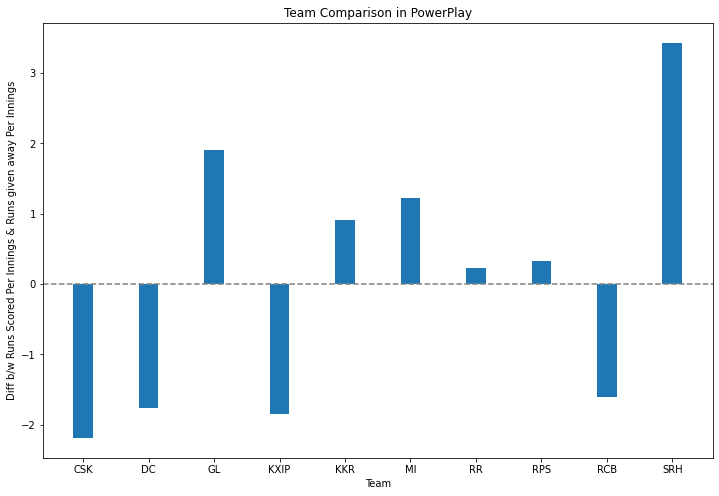

In [10]:
# Negative Difference means that the team scores less runs than it gives away 
# Similarly positive difference means that the team is scoring more runs than it is giving away
plot_df(mydf_updated[0] , 'Team Comparison in PowerPlay')

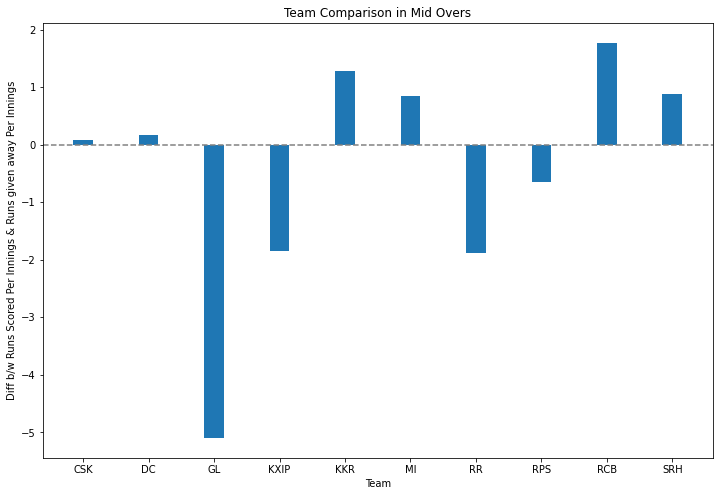

In [11]:
# Negative Difference means that the team scores less runs than it gives away 
# Similarly positive difference means that the team is scoring more runs than it is giving away
plot_df(mydf_updated[1] , 'Team Comparison in Mid Overs')

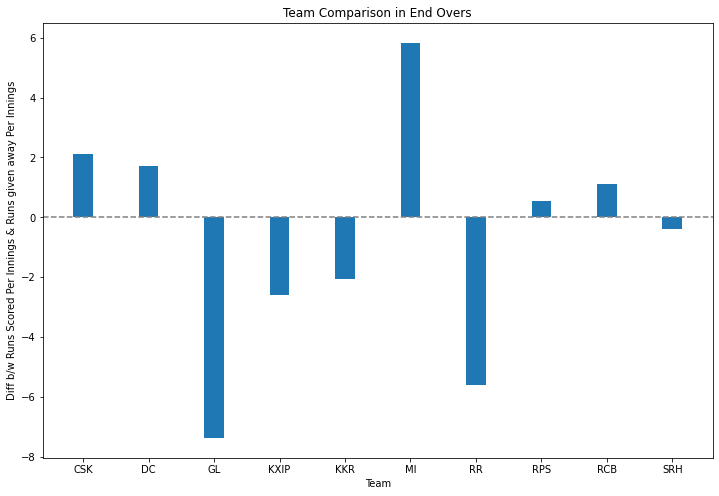

In [12]:
# Negative Difference means that the team scores less runs than it gives away 
# Similarly positive difference means that the team is scoring more runs than it is giving away
plot_df(mydf_updated[2] , 'Team Comparison in End Overs')

In [13]:
# debug - PowerPlay
mydf_updated[0]

,team,team_runs,team_num_innings,team_runs_against,team_num_innings_against,Difference
0,Chennai Super Kings,2704,64,2844,64,-2.187500
1,Delhi Capitals,3923,89,4080,89,-1.764045
2,Gujarat Lions,1480,30,1423,30,1.900000
3,Kings XI Punjab,3855,84,4010,84,-1.845238
4,Kolkata Knight Riders,4164,88,4084,88,0.909091
5,Mumbai Indians,4184,93,4070,93,1.225806
6,Rajasthan Royals,2572,56,2605,57,0.226817
7,Rising Pune Supergiants,1355,30,1345,30,0.333333
8,Royal Challengers Bangalore,3935,88,4030,87,-1.605930
9,Sunrisers Hyderabad,4378,93,4059,93,3.430108


In [14]:
#debug - Mid Overs
mydf_updated[1]

,team,team_runs,team_num_innings,team_runs_against,team_num_innings_against,Difference
0,Chennai Super Kings,4686,64,4681,64,0.078125
1,Delhi Capitals,6654,88,6639,88,0.170455
2,Gujarat Lions,2279,30,2432,30,-5.100000
3,Kings XI Punjab,6277,84,6432,84,-1.845238
4,Kolkata Knight Riders,6607,86,6648,88,1.280127
5,Mumbai Indians,7138,93,7060,93,0.838710
6,Rajasthan Royals,4174,55,4278,55,-1.890909
7,Rising Pune Supergiants,2038,30,1989,29,-0.652874
8,Royal Challengers Bangalore,6402,85,6325,86,1.771135
9,Sunrisers Hyderabad,6950,93,6721,91,0.874040


In [15]:
#debug - End Overs
mydf_updated[2]

,team,team_runs,team_num_innings,team_runs_against,team_num_innings_against,Difference
0,Chennai Super Kings,2313,64,2143,63,2.124752
1,Delhi Capitals,2934,84,2724,82,1.709059
2,Gujarat Lions,868,28,1036,27,-7.370370
3,Kings XI Punjab,2599,76,2834,77,-2.607826
4,Kolkata Knight Riders,2785,80,2950,80,-2.062500
5,Mumbai Indians,3453,88,3040,91,5.832043
6,Rajasthan Royals,1868,54,2131,53,-5.614955
7,Rising Pune Supergiants,939,26,996,28,0.543956
8,Royal Challengers Bangalore,3003,78,2841,76,1.118421
9,Sunrisers Hyderabad,2940,87,3007,88,-0.377351


In [16]:
mydf_updated[0] = mydf_updated[0].drop(["team_runs", "team_num_innings", "team_runs_against", "team_num_innings_against"], axis = 1)
mydf_updated[1] = mydf_updated[1].drop(["team_runs", "team_num_innings", "team_runs_against", "team_num_innings_against"], axis = 1)
mydf_updated[2] = mydf_updated[2].drop(["team_runs", "team_num_innings", "team_runs_against", "team_num_innings_against"], axis = 1)

mydf_updated[0].rename(columns={"Difference": "PowerPlay Diff"}, inplace=True)
mydf_updated[1].rename(columns={"Difference": "MidOvers Diff"}, inplace=True)
mydf_updated[2].rename(columns={"Difference": "EndOvers Diff"}, inplace=True)

In [17]:
team_performance = mydf_updated[0].merge(mydf_updated[1], on = 'team', how = 'left')
team_performance = team_performance.merge(mydf_updated[2], on = 'team', how = 'left')

In [18]:
# debug - Combined DataFrame
team_performance

,team,PowerPlay Diff,MidOvers Diff,EndOvers Diff
0,Chennai Super Kings,-2.187500,0.078125,2.124752
1,Delhi Capitals,-1.764045,0.170455,1.709059
2,Gujarat Lions,1.900000,-5.100000,-7.370370
3,Kings XI Punjab,-1.845238,-1.845238,-2.607826
4,Kolkata Knight Riders,0.909091,1.280127,-2.062500
5,Mumbai Indians,1.225806,0.838710,5.832043
6,Rajasthan Royals,0.226817,-1.890909,-5.614955
7,Rising Pune Supergiants,0.333333,-0.652874,0.543956
8,Royal Challengers Bangalore,-1.605930,1.771135,1.118421
9,Sunrisers Hyderabad,3.430108,0.874040,-0.377351
